In [5]:
import pandas as pd

hints_ua_full_path = '{}/{}'.format(base_path,'ignore/hints/part-00000-af78ad21-39a2-4a55-b933-cab569a5df85-c000.csv')
hints_ap_full_path = '{}/{}'.format(base_path,'pos/hints/part-00000-8a90981c-fb90-4aef-8506-dd59737c8adf-c000.csv')
hints_an_full_path='{}/{}'.format(base_path,'neg/hints/part-00000-752aa3d1-b979-48b5-b9f2-89bea44c1f7e-c000.csv')

In [6]:
ua_hints_df= pd.read_csv(hints_ua_full_path)
ua_hints_df.head()

,hint,ua_hint_count
0,6,512513
1,3,383639
2,7,327177
3,0,325940
4,1,140082


In [7]:
ap_hints_df = pd.read_csv(hints_ap_full_path)
ap_hints_df.head(20)

,hint,ap_hint_count
0,6,5801
1,7,5237
2,3,4502
3,0,2254
4,1,1084
5,8,713
6,4,454
7,2,220
8,5,105
9,11,6


In [8]:
an_hints_df = pd.read_csv(hints_an_full_path)
an_hints_df.head(20)

,hint,an_hint_count
0,6,3158
1,7,2874
2,3,2546
3,0,1082
4,1,523
5,8,346
6,4,232
7,2,124
8,5,47


In [10]:
result_df = pd.merge(ua_hints_df,ap_hints_df, on='hint', how='inner')
result_df = pd.merge(result_df,an_hints_df, on='hint', how='inner')
result_df.head(20)

,hint,ua_hint_count,ap_hint_count,an_hint_count
0,6,512513,5801,3158
1,3,383639,4502,2546
2,7,327177,5237,2874
3,0,325940,2254,1082
4,1,140082,1084,523
5,4,74818,454,232
6,8,70321,713,346
7,2,49207,220,124
8,5,9704,105,47


In [11]:
result_df['sum'] = result_df[['ua_hint_count','ap_hint_count','an_hint_count']].sum(axis=1)
#result_df.head()
result_df.head(20)

,hint,ua_hint_count,ap_hint_count,an_hint_count,sum
0,6,512513,5801,3158,521472
1,3,383639,4502,2546,390687
2,7,327177,5237,2874,335288
3,0,325940,2254,1082,329276
4,1,140082,1084,523,141689
5,4,74818,454,232,75504
6,8,70321,713,346,71380
7,2,49207,220,124,49551
8,5,9704,105,47,9856


In [12]:
result_df['ua_perc']= round(result_df['ua_hint_count']/result_df['sum'] * 100,4)
result_df['ap_perc']= round(result_df['ap_hint_count']/result_df['sum'] * 100,4)
result_df['an_perc']= round(result_df['an_hint_count']/result_df['sum'] * 100,4)
result_df=result_df.sort_values('ap_perc',ascending=False).reset_index()
result_df= result_df[['hint','ua_perc','ap_perc','an_perc','sum']]

result_df.head(15)

,hint,ua_perc,ap_perc,an_perc,sum
0,7,97.5809,1.5619,0.8572,335288
1,3,98.1960,1.1523,0.6517,390687
2,6,98.2820,1.1124,0.6056,521472
3,5,98.4578,1.0653,0.4769,9856
4,8,98.5164,0.9989,0.4847,71380
5,1,98.8658,0.7651,0.3691,141689
6,0,98.9869,0.6845,0.3286,329276
7,4,99.0914,0.6013,0.3073,75504
8,2,99.3058,0.4440,0.2502,49551


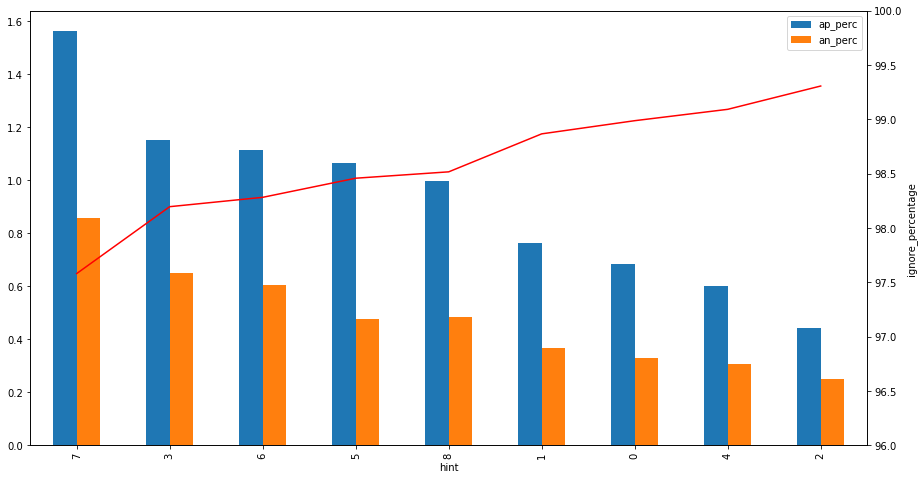

In [14]:
from numpy import array
from matplotlib import pyplot as plt
import numpy as np

ax1 = plt.gca()
ind = result_df['ua_perc']
ind_arr =  array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="hint", y=['ap_perc','an_perc'], kind="bar",ax=ax1,figsize=(15,8))
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r-')
ax2.set_ylabel('ignore_percentage')
ax2.set_ylim((96.0,100.0))
plt.show()

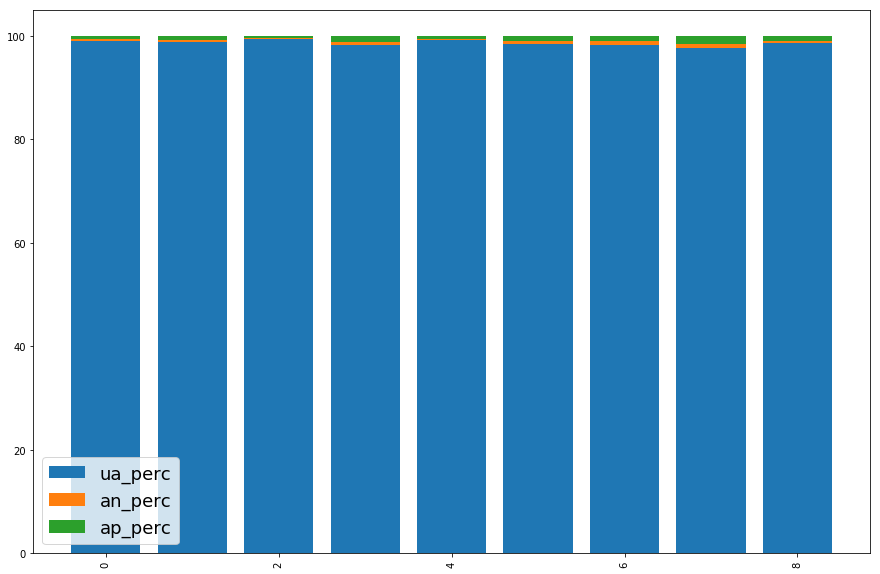

In [15]:
result_df_stackbar = result_df[['hint','ua_perc','an_perc','ap_perc']]
cumval=0
fig = plt.figure(figsize=(15,10))
for col in result_df_stackbar.columns[~result_df_stackbar.columns.isin(['hint'])]:
    plt.bar(result_df_stackbar.hint, result_df_stackbar[col], bottom=cumval, label=col)
    cumval = cumval+result_df_stackbar[col]

_ = plt.xticks(rotation=90)
_ = plt.legend(fontsize=18)

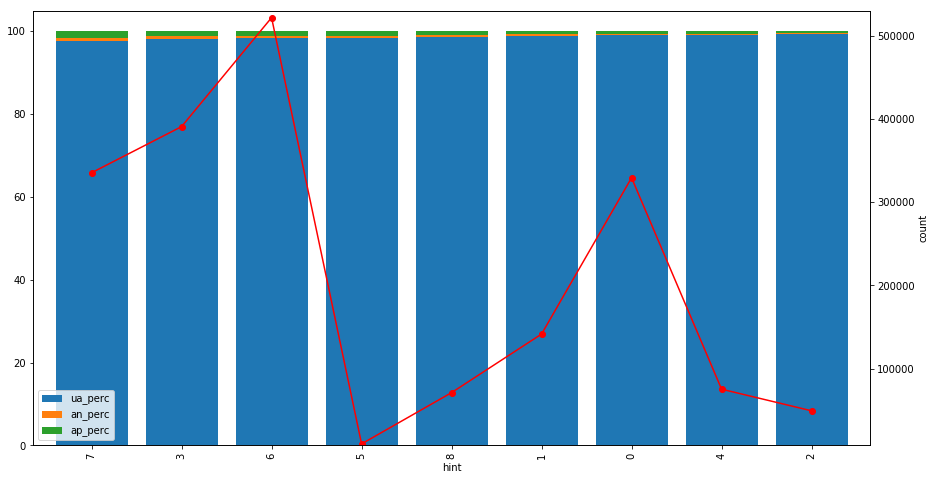

In [19]:
from numpy import array
import numpy as np
ax1 = plt.gca()
ind = result_df['sum']
ind_arr = array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="hint", y=['ua_perc','an_perc','ap_perc'], kind="bar",stacked=True,ax=ax1,figsize=(15,8),width=0.8)
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r--', linestyle='-', marker='o', color='red')
ax2.set_ylabel('count')
ax2.set_ylim((8000,530000))
plt.show()